In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import nanonets
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.optimize import curve_fit
from scipy.special import gamma
plt.style.use(["science","bright","grid"])

cm  = plt.get_cmap('cividis')
ma  = ["o","s","^","v","<",">"]

PATH    = "/home/jonasmensing/bagheera/data/2_funding_period/dynamic/DC/size_volt/"
U0_VALS = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
NP_VALS = [3,5,7,9,11,13,15]

def shift_and_append(dfs_dict):
    for name, df in dfs_dict.items():
        col1 = df.pop("1")  # remove column 1
        df.columns = range(df.shape[1])  # reassign column names to keep them sequential
        df[len(df.columns)] = col1  # append column 1's data at the end
    return dfs_dict

## DC Input - Voltage Distribution - Closed Circuit

In [10]:
N_voltages  = 50000
t_vals      = np.arange(N_voltages-1)*1e-10*1e9
data        = {Np : {U0 : pd.read_csv(f"{PATH}Nx={Np}_Ny={Np}_Ne=8_{U0:.3f}.csv") for U0 in U0_VALS} for Np in NP_VALS}

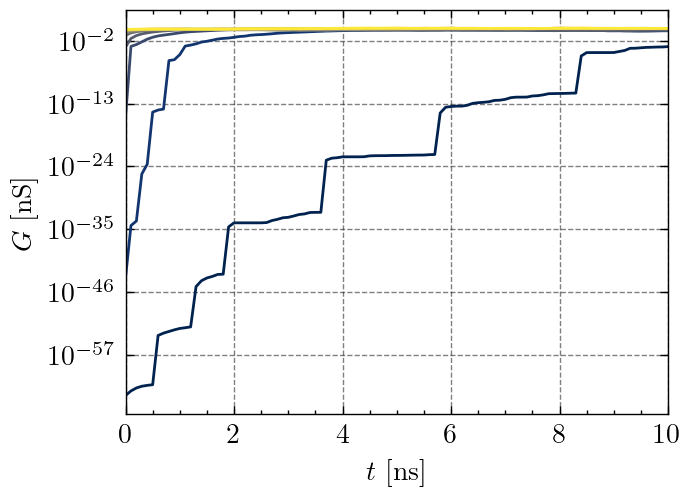

In [44]:
N_p     = 9
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
norm    = Normalize(vmin=U0_VALS[0], vmax=U0_VALS[-1])
for U_0 in U0_VALS:
    ax.plot(t_vals, data[N_p][U_0]['Observable'].values*1e-9/U_0, '-', color=cm(norm(U_0)))
    # ax.fill_between(t_vals, data[N_p][U_0]['Observable'].values*1e-9/U_0, color=cm(norm(U_0)))
ax.set_ylabel("$G$ [nS]")
ax.set_xlabel("$t$ [ns]")
ax.set_xlim(0,10)
ax.set_yscale('log')

## Output Potential

In [49]:
output_c = {U_0 : pd.read_csv(f"{folder1}Nx={N_p}_Ny=1_Ne=2_{U_0:.3f}.csv").round(5)['Observable'].values for U_0 in U0_vals}
output_o = {U_0 : pd.read_csv(f"{folder2}Nx={N_p}_Ny=1_Ne=2_{U_0:.3f}.csv").round(5)['Observable'].values for U_0 in U0_vals}

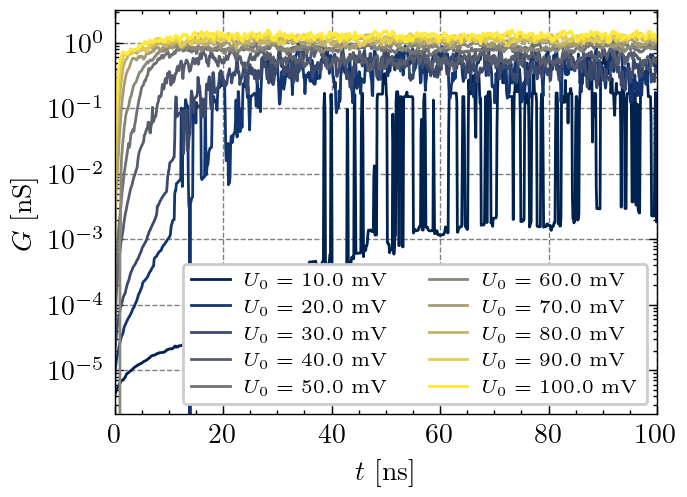

In [50]:
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
norm    = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1])
for U_0 in U0_vals:
    ax.plot(t_vals, output_c[U_0]*1e-9/U_0, label=f'$U_0 = {U_0*1000}$ mV', color=cm(norm(U_0)))
ax.legend(fontsize='x-small', ncol=2)
ax.set_ylabel("$G$ [nS]")
ax.set_xlabel("$t$ [ns]")
ax.set_xlim(0,100)
# ax.set_ylim(0.05,1.2)
ax.set_yscale('log')

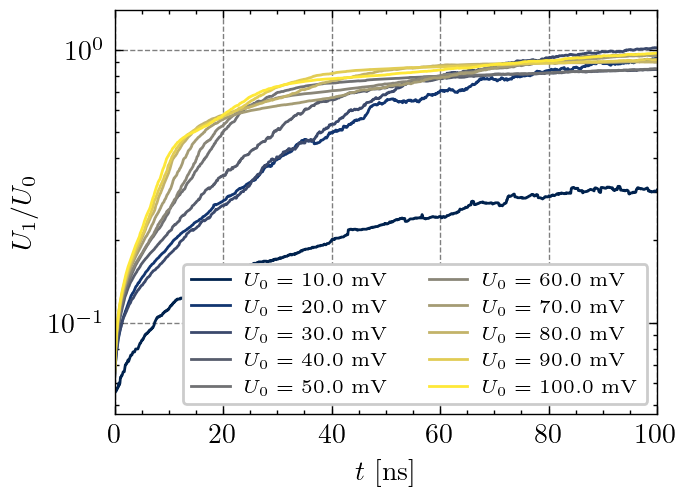

In [51]:
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
norm    = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1])
for U_0 in U0_vals:
    ax.plot(t_vals, output_o[U_0]/U_0, label=f'$U_0 = {U_0*1000}$ mV', color=cm(norm(U_0)))
ax.legend(fontsize='x-small', ncol=2)
ax.set_ylabel("$U_1/U_0$")
ax.set_xlabel("$t$ [ns]")
ax.set_xlim(0,100)
# ax.set_ylim(0.05,1.2)
ax.set_yscale('log')

## Potential Curves

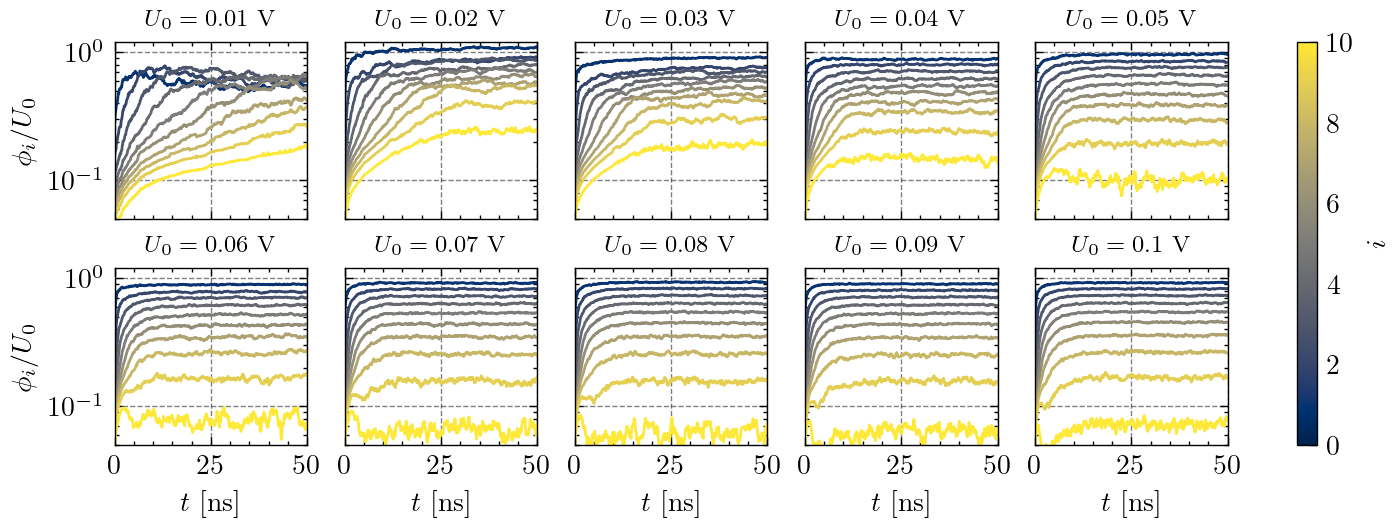

In [52]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
norm    = Normalize(vmin=0, vmax=10)
all_ax  = []

for n, U_0 in enumerate(U0_vals):
    ax = fig.add_subplot(2,5,n+1)
    all_ax.append(ax)
    for i in range(1,N_p+1):
        ax.plot(t_vals, pot_closed[U_0][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.05,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

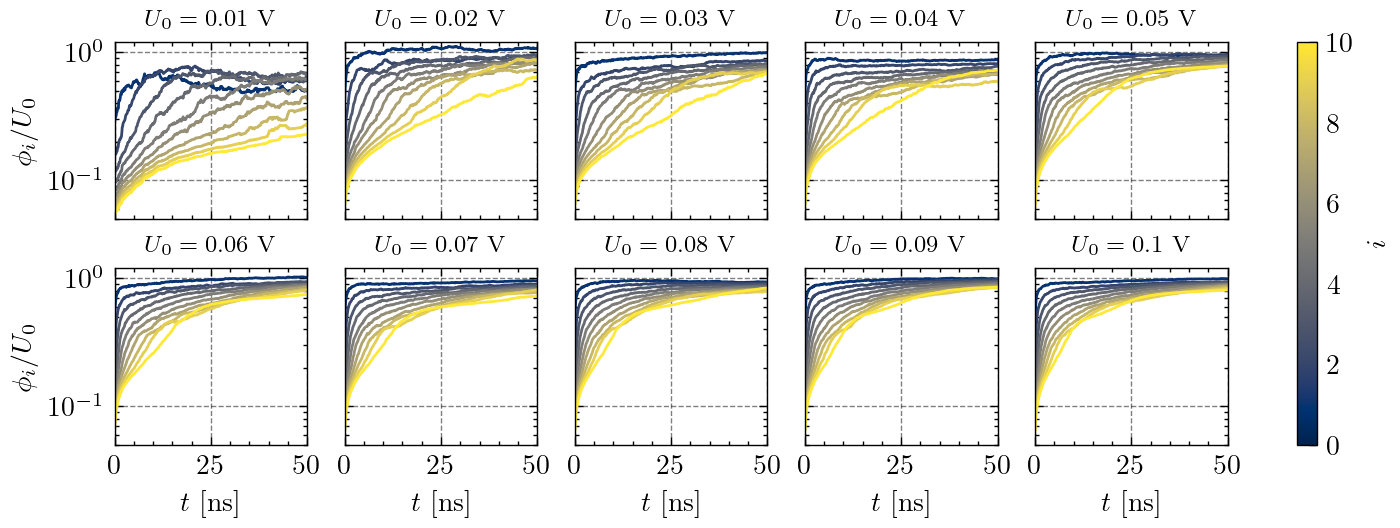

In [53]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
norm    = Normalize(vmin=0, vmax=10)
all_ax  = []

for n, U_0 in enumerate(U0_vals):
    ax = fig.add_subplot(2,5,n+1)
    all_ax.append(ax)
    for i in range(1,N_p+1):
        ax.plot(t_vals, pot_open[U_0][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.05,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

## Potential Correlation

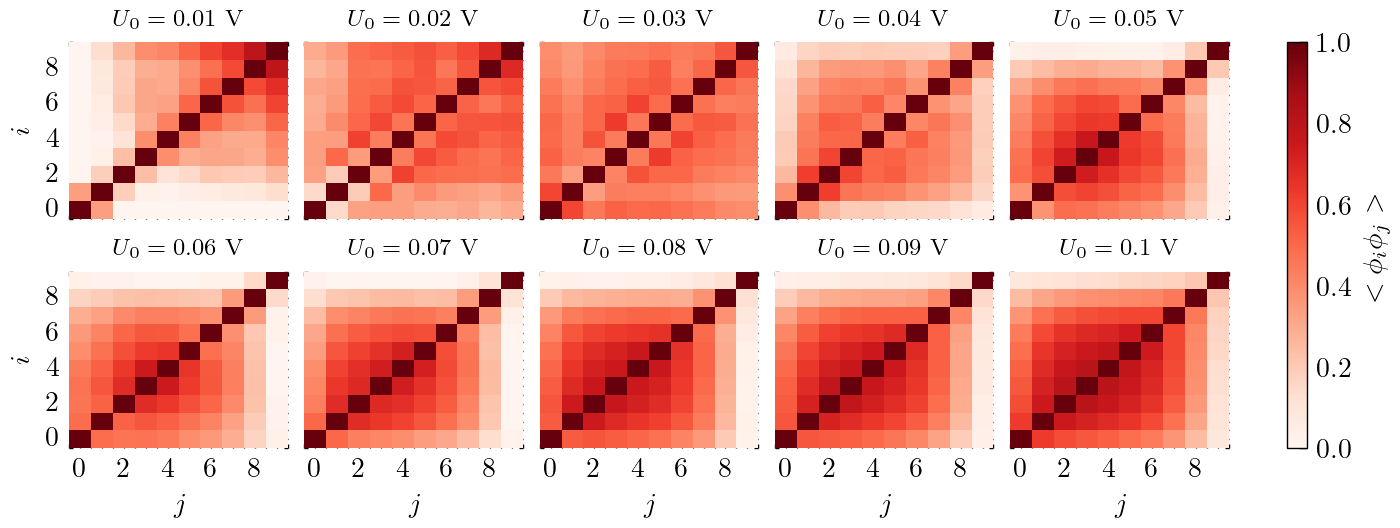

In [54]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_closed[U_0].drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='Reds', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{i}\phi_{j}>$")

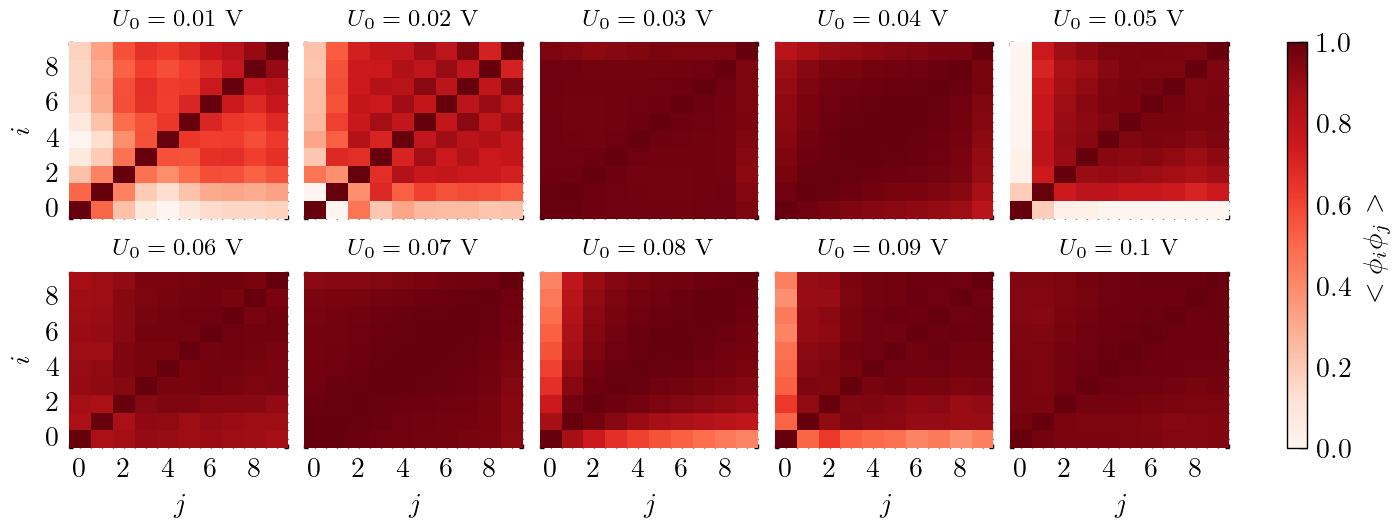

In [55]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_open[U_0].drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='Reds', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{i}\phi_{j}>$")

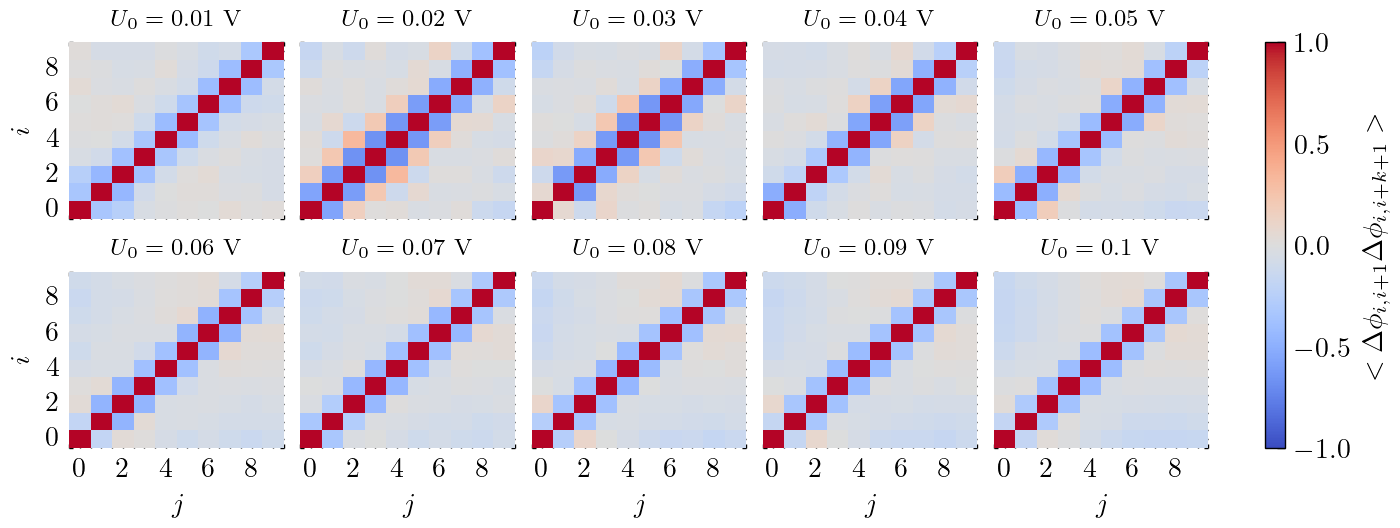

In [56]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=-1, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_closed[U_0].diff(axis=1).drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\Delta\phi_{i,i+1}\Delta\phi_{i,i+k+1}>$")

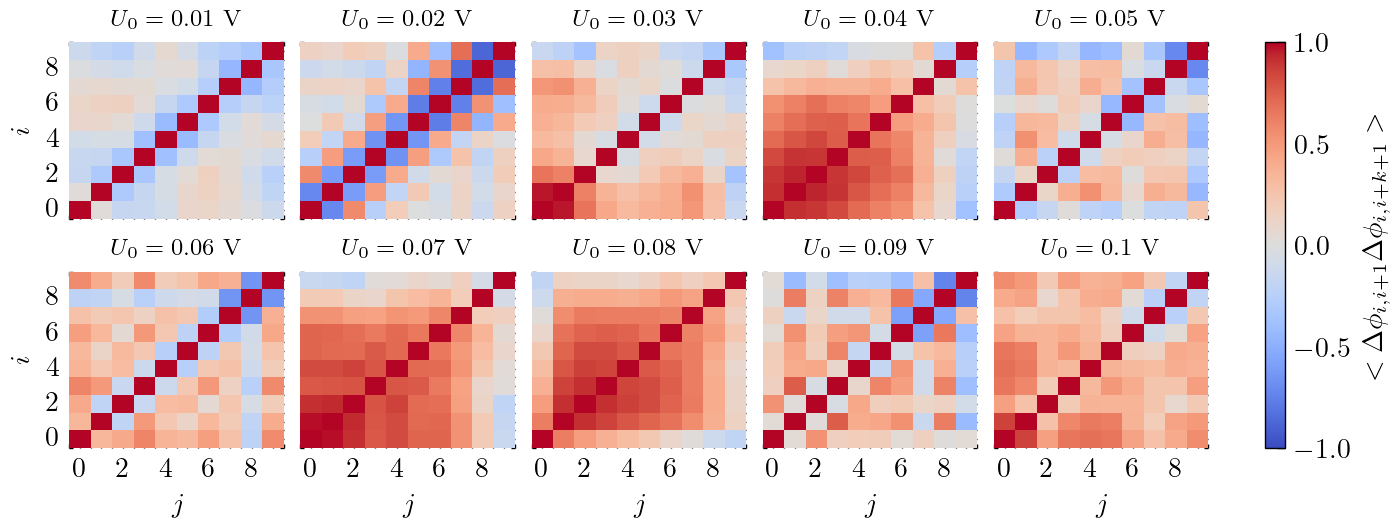

In [57]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=-1, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_open[U_0].diff(axis=1).drop(columns=[0,11]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\Delta\phi_{i,i+1}\Delta\phi_{i,i+k+1}>$")

## Characteristic Time Scale @ Potentials

In [27]:
p_vals_c, cov_vals_c = {}, {}
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_p+1):

        x       = t_vals.copy()
        y       = pot_closed[U_0].loc[:,k].values
        y_max   = np.mean(y[-10000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))

        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_c[U_0] = np.array(p_tmp)
    cov_vals_c[U_0] = np.array(cov_tmp)

/tmp/ipykernel_19653/316105763.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))


(0.1, 1.0)

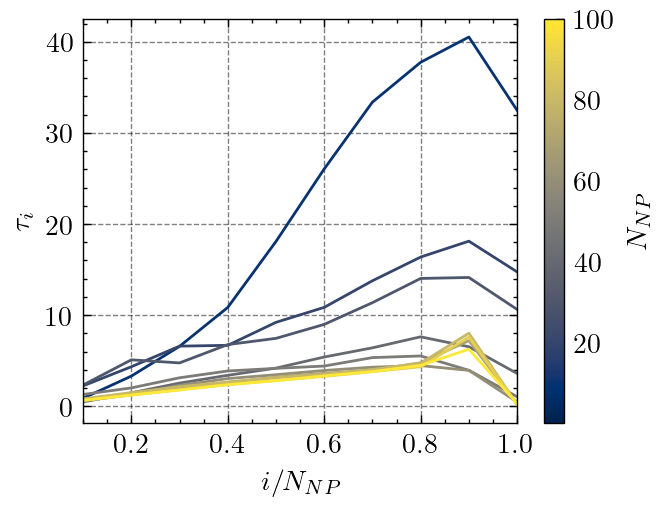

In [28]:
norm = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1]*1000)

fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for U0 in U0_vals:
    ax.plot(np.arange(1,N_p+1)/N_p, p_vals_c[U0][:,0], color=cm(norm(U0*1000)))

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$N_{NP}$")

ax.set_ylabel("$\\tau_i$")
ax.set_xlabel("$i/N_{NP}$")
ax.set_xlim(0.1,1)

In [29]:
p_vals_o, cov_vals_o = {}, {}
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_p+1):

        x       = t_vals.copy()
        y       = pot_open[U_0].loc[:,k].values
        y_max   = np.mean(y[-10000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        try:
            p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))
        except:
            p   = np.array([0,0])
            cov = np.array([[0.0,0.0],[0.0,0.0]])
        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_o[U_0] = np.array(p_tmp)
    cov_vals_o[U_0] = np.array(cov_tmp)

(0.1, 1.0)

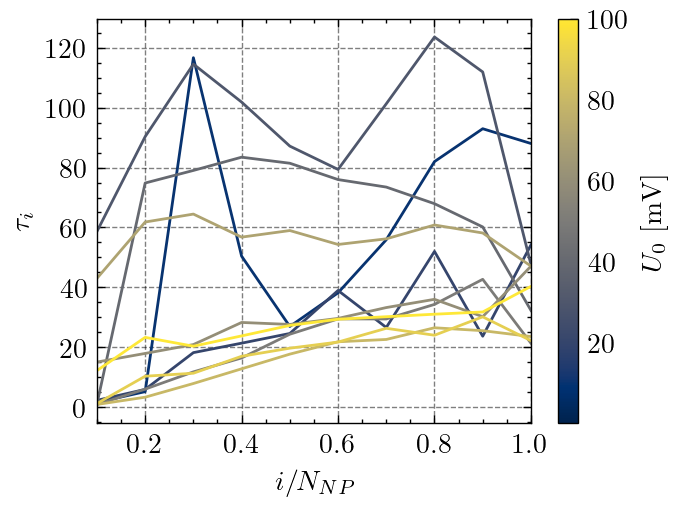

In [30]:
norm = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1]*1000)

fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for U0 in U0_vals:
    ax.plot(np.arange(1,N_p+1)/N_p, p_vals_o[U0][:,0], color=cm(norm(U0*1000)))

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$U_0$ [mV]")

ax.set_ylabel("$\\tau_i$")
ax.set_xlabel("$i/N_{NP}$")
ax.set_xlim(0.1,1)

## Characteristic Time Scale @ Output

In [43]:
p_vals_c, cov_vals_c = [], []
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:

    x       = t_vals.copy()
    y       = output_c[U_0]
    y_max   = np.mean(y[-5000:])
    def func(t, tau, a0):
        return y_max - a0*np.exp(-t/tau)
    
    t0      = np.argmax(y>p0*y_max)
    t1      = np.argmax(y>p1*y_max)
    x_fit   = x.copy()[t0:t1]
    y_fit   = y.copy()[t0:t1]
    p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))

    p_vals_c.append(p)
    cov_vals_c.append(cov)
p_vals_c = np.array(p_vals_c)
cov_vals_c = np.array(cov_vals_c)

/tmp/ipykernel_19653/3718912025.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))


Text(0, 0.5, '$\\tau_1$ [ns]')

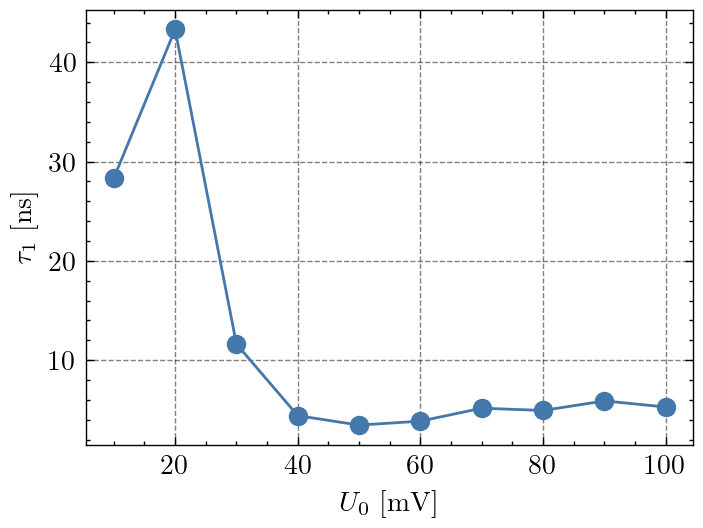

In [44]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot()
ax.plot(np.array(U0_vals)*1000, p_vals_c[:,0], 'o-')
ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$\\tau_1$ [ns]")

In [45]:
p_vals_o, cov_vals_o = [], []
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:

    x       = t_vals.copy()
    y       = output_o[U_0]
    y_max   = np.mean(y[-5000:])
    def func(t, tau, a0):
        return y_max - a0*np.exp(-t/tau)
    
    t0      = np.argmax(y>p0*y_max)
    t1      = np.argmax(y>p1*y_max)
    x_fit   = x.copy()[t0:t1]
    y_fit   = y.copy()[t0:t1]
    p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))

    p_vals_o.append(p)
    cov_vals_o.append(cov)
p_vals_o = np.array(p_vals_o)
cov_vals_o = np.array(cov_vals_o)

Text(0, 0.5, '$\\tau_1$ [ns]')

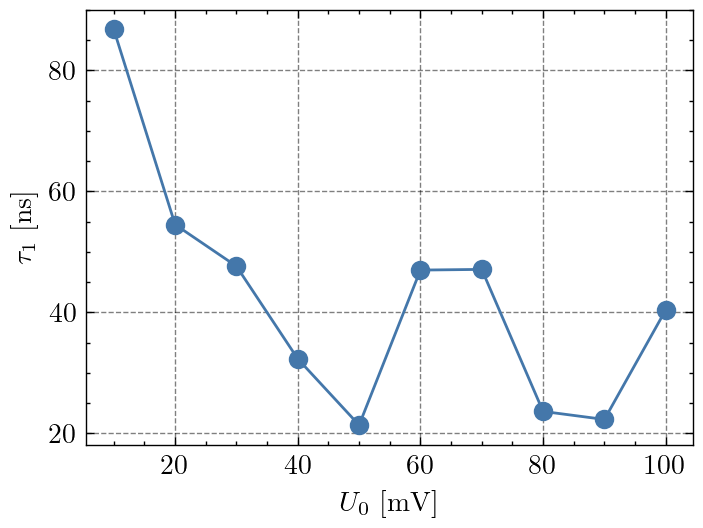

In [46]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot()
ax.plot(np.array(U0_vals)*1000, p_vals_o[:,0], 'o-')
ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$\\tau_1$ [ns]")